![](./resource/cnn.png)

## Feature Extractor

Conv
```python
Conv2D(input_shape=(n,n,n), kernel_size=(3,3), filters=32) # 1st layer로 Conv2D가 쓰일 때(inpuut_shape)
# kernel_size: 필터 크기, filters: 필터 개수, default: strides=(1,1), activation='relu'
```

max pooling
```python
MaxPool2D(pool_size=(2,2), paddding='valid'))
# pool_size: 2행2열의 사각형에서 maxpooling을 수행
```

## Classifier

Flatten(): Feature Extractor의 출력인 3차원 tensor(높이, 넓이, 채널)와 완전연결층(Dense)의 연결을 위해 수행   
Dense(): 출력층에서는 activation='softmax'를 사용  
Dropout(rate=0.2): rate의 비율만큼 랜덤하게 층과 층 사이의 연결을 끊어 네트워크의 과적합을 막는 역할을 수행

In [10]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [13]:
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [14]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [15]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [16]:
hist = cnn.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
469/469 [==============================] - 143s 303ms/step - loss: 0.5357 - accuracy: 0.8123 - val_loss: 0.3431 - val_accuracy: 0.8769
Epoch 2/30
469/469 [==============================] - 230s 491ms/step - loss: 0.3449 - accuracy: 0.8780 - val_loss: 0.2823 - val_accuracy: 0.8964
Epoch 3/30
469/469 [==============================] - 205s 437ms/step - loss: 0.2926 - accuracy: 0.8953 - val_loss: 0.2619 - val_accuracy: 0.9041
Epoch 4/30
469/469 [==============================] - 204s 436ms/step - loss: 0.2616 - accuracy: 0.9042 - val_loss: 0.2638 - val_accuracy: 0.8995
Epoch 5/30
469/469 [==============================] - 243s 517ms/step - loss: 0.2371 - accuracy: 0.9130 - val_loss: 0.2390 - val_accuracy: 0.9112
Epoch 6/30
469/469 [==============================] - 172s 367ms/step - loss: 0.2139 - accuracy: 0.9209 - val_loss: 0.2243 - val_accuracy: 0.9162
Epoch 7/30
469/469 [==============================] - 152s 325ms/step - loss: 0.1988 - accuracy: 0.9269 - val_loss: 0.2200 -

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2923 - accuracy: 0.9266


[0.29227662086486816, 0.9265999794006348]

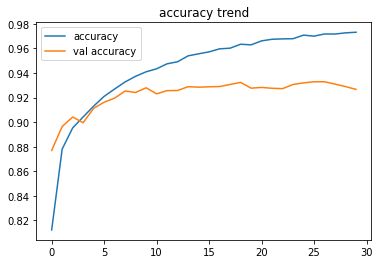

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy trend')

plt.legend(['accuracy', 'val accuracy'], loc='best')

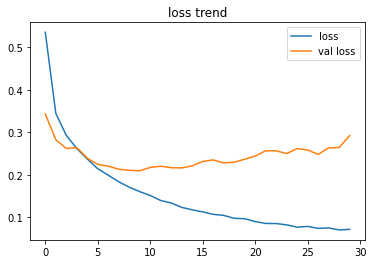

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss trend')

plt.legend(['loss', 'val loss'], loc='best')

CNN 성능 향상 
- 더 많은 레이어 쌓기  
컨볼루션 레이어가 중첩된 더 깊은 구조가 될수록 성능은 크게 개선됨
- 이미지 데이터 보강 (Image data Augmentation)
많은 학습 데이터를 사용하면 좋다. -> 기존 이미지 데이터에 다양한 변형(rotate, shear, shift, ..)을 주고 이렇게 생성된 데이터를 원복 학습 데이터에 포함시킨다. 
- 높은 해상도 학습 데이터 확보  
동일한 cnn구조라면 상대적으로 높은 해상도의 학습데이터를 통해 성능 개선이 가능하다. 
- 가중치 규제, Dropout, Batch Normalization으로도 성능을 향상 시킬 수 있다. 